In [1]:
import os
import pandas as pd

path = r'D:\elice_python\GAS_5\pytest_machine'

os.chdir(path)

In [6]:
data = pd.read_csv('tree.csv', header=0)
print(data.shape)
print(data.head(3))

(100, 3)
      x1     x2    y
0  1.880  0.568  1.0
1  0.369 -0.349  1.0
2  0.965  0.109  0.0


In [7]:
X = data.iloc[:,:-1]
y= data.iloc[:,-1]
print(X.shape, y.shape)

(100, 2) (100,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_features='sqrt')
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.96


max_features = 'sqrt'
- sqrt : 특성 수의 제곱근 (기본값)
- log2 : 특성 수의 로그값
- int : 지정된 개수
- None: 모든 특성

### 특성 중요도 관찰.
- 특성 중요도를 보고자 할 때는 랜덤 포레스트 모델이 가장 많이 사용된다.

num_of_feature : 2


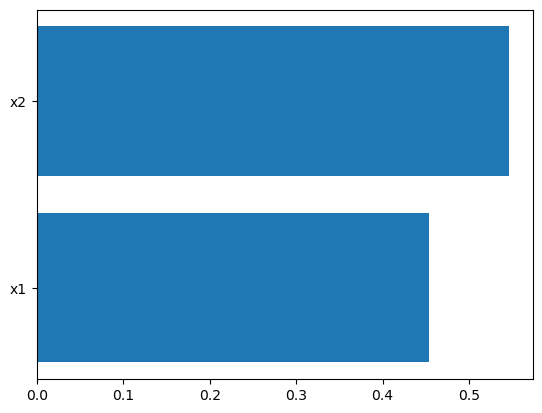

In [14]:
import matplotlib.pyplot as plt
import numpy as np

n_features = X_train.shape[1]
print('num_of_feature :', n_features)

plt.barh(np.arange(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), labels=X_train.columns)
plt.show()

random forest는 각 트리의 특성 중요도를 취합하여 계산한다.

일반적으로 random forest에서 제공하는 특성 중요도가 하나의 결정 트리에서 제공하는 것보다 더 신뢰할 만하다.